## 1. Data Audit & Cleaning

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the dataset
data = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
basic_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Check for duplicates
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [5]:
missing_values = data.isnull().sum()
print(f"Missing Values:\n{missing_values}")


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [6]:
object_columns_unique = {col: data[col].unique() for col in data.select_dtypes(include='object').columns}
object_columns_unique

{'Attrition': array(['Yes', 'No'], dtype=object),
 'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object),
 'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object),
 'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
        'Technical Degree', 'Human Resources'], dtype=object),
 'Gender': array(['Female', 'Male'], dtype=object),
 'JobRole': array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'],
       dtype=object),
 'MaritalStatus': array(['Single', 'Married', 'Divorced'], dtype=object),
 'Over18': array(['Y'], dtype=object),
 'OverTime': array(['Yes', 'No'], dtype=object)}

In [7]:
irrelevant_cols = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']
data_cleaned = data.drop(columns=irrelevant_cols)

In [8]:
data_cleaned.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


## 2. Advanced EDA (Better than Generic)

### 1. Attrition Distribution

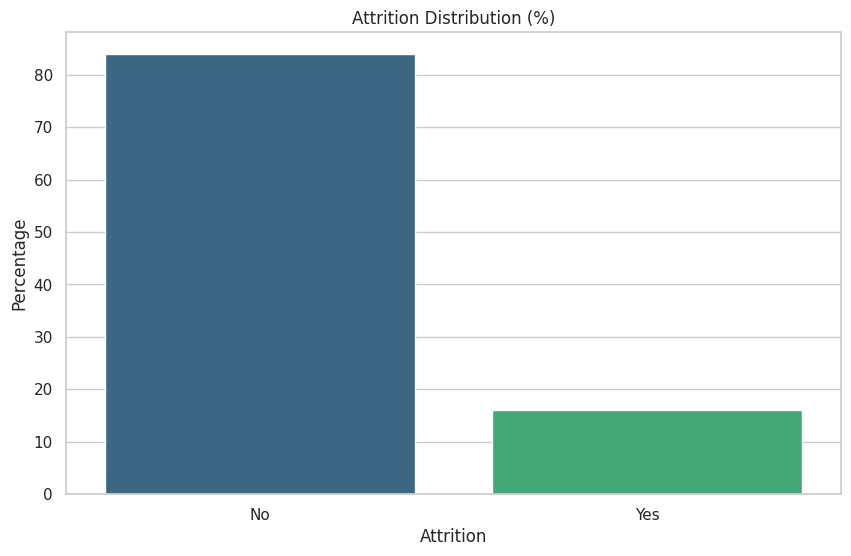

In [9]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

data_cleaned["Attrition_Flag"] = data_cleaned["Attrition"].apply(lambda x: 1 if x == "Yes" else 0)

attrition_dist = data_cleaned["Attrition"].value_counts(normalize=True) * 100


# Attrition Distribution
sns.barplot(x=attrition_dist.index, y=attrition_dist.values, palette="viridis")
plt.title("Attrition Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Attrition")
plt.show()

* Found ~16% of employees left the company (class imbalance).

* Important for ML: shows need for class-balancing techniques.

### 2. Attrition by Department

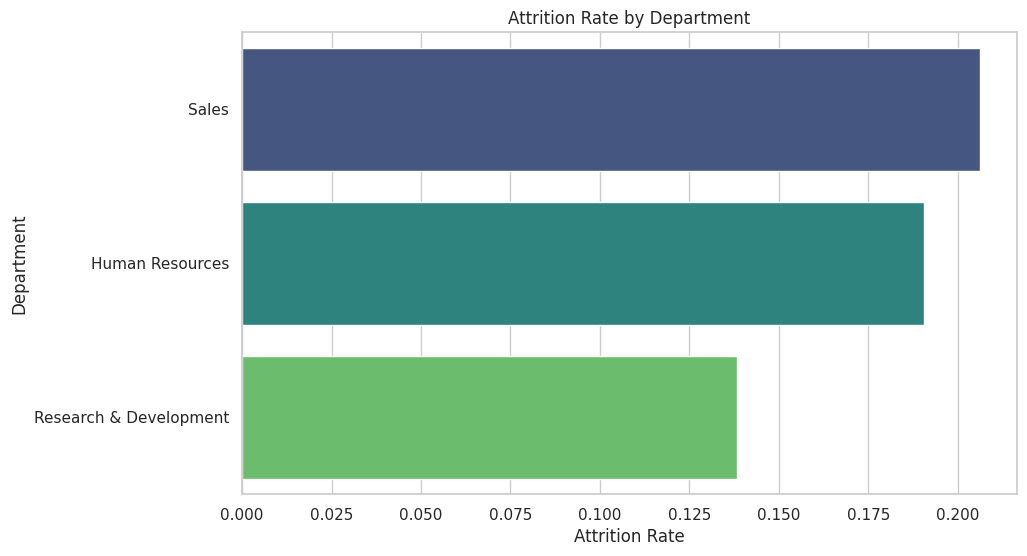

In [10]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

attrition_by_dept = data_cleaned.groupby("Department")["Attrition_Flag"].mean().sort_values(ascending=False)

# Attrition by Department
sns.barplot(x=attrition_by_dept.values, y=attrition_by_dept.index, palette="viridis")
sns.color_palette("tab10")
plt.title("Attrition Rate by Department")
plt.ylabel("Department")
plt.xlabel("Attrition Rate")
plt.show()

* Sales and HR departments had the highest attrition rates.

* R&D had the lowest, suggesting better retention practices.

### 3. Attrition by Job Role

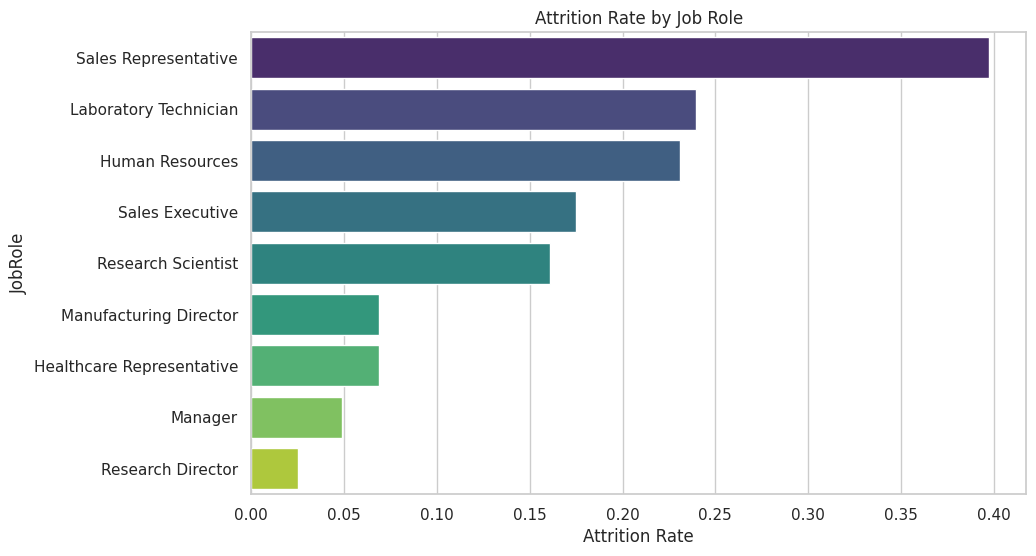

In [11]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

attrition_by_job = data_cleaned.groupby("JobRole")["Attrition_Flag"].mean().sort_values(ascending=False)

sns.barplot(x=attrition_by_job.values, y=attrition_by_job.index, palette="viridis")
plt.title("Attrition Rate by Job Role")
plt.xlabel("Attrition Rate")
plt.show()


* Sales Representatives and Lab Technicians showed significantly higher attrition.

* Roles like Research Director and Manager had much lower attrition rates.

### 4. Attrition by Gender

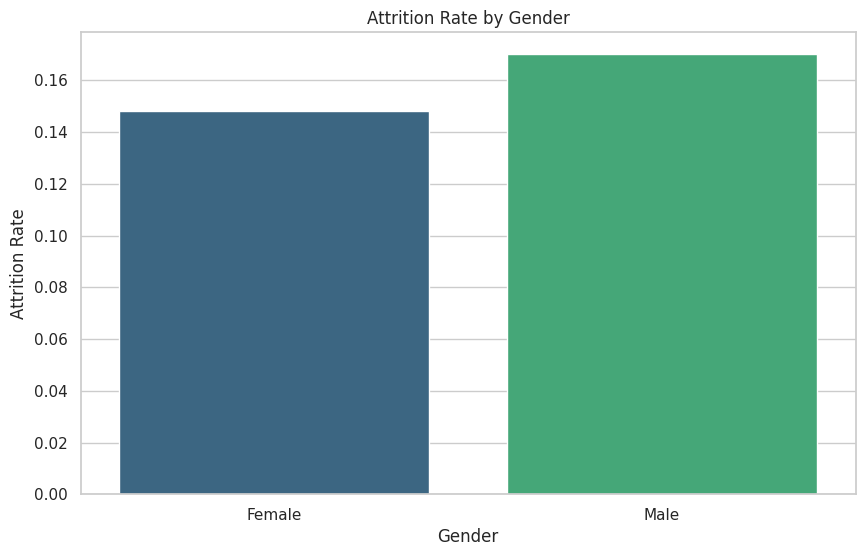

In [12]:
attrition_by_gender = data_cleaned.groupby("Gender")["Attrition_Flag"].mean()

sns.barplot(x=attrition_by_gender.index, y=attrition_by_gender.values, palette="viridis")
plt.title("Attrition Rate by Gender")
plt.ylabel("Attrition Rate")
plt.xlabel("Gender")
plt.show()


* Slightly higher attrition among males, but the difference was minor.

* Suggests gender may not be a strong standalone predictor.

### 5. Monthly Income vs Attrition (Violin Plot)

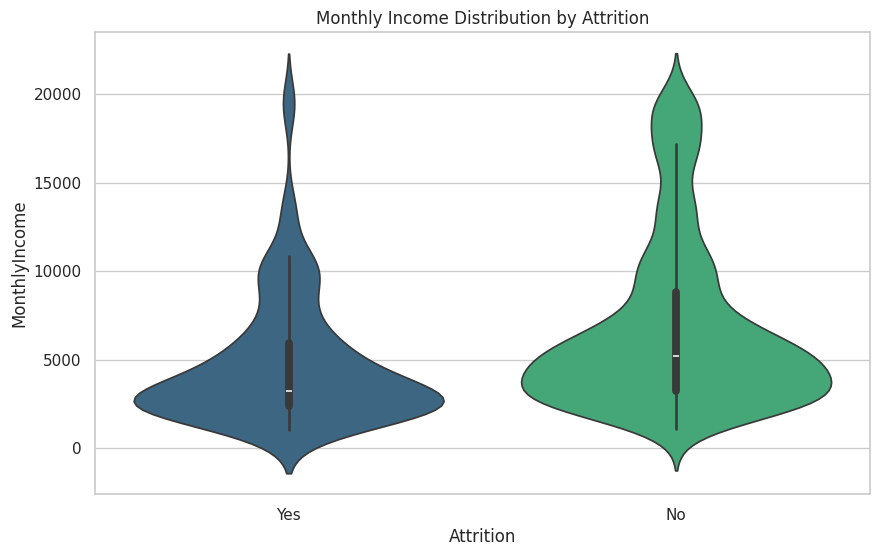

In [13]:
sns.violinplot(x="Attrition", y="MonthlyIncome", data=data_cleaned, palette="viridis")
plt.title("Monthly Income Distribution by Attrition")
plt.show()

* Employees who left generally had lower income.

* Showed income clustering among those who stayed (wider spread for "No").



### 6. Top Correlations with Attrition (Heatmap)

Text(0.5, 1.0, 'Correlation with Attrition')

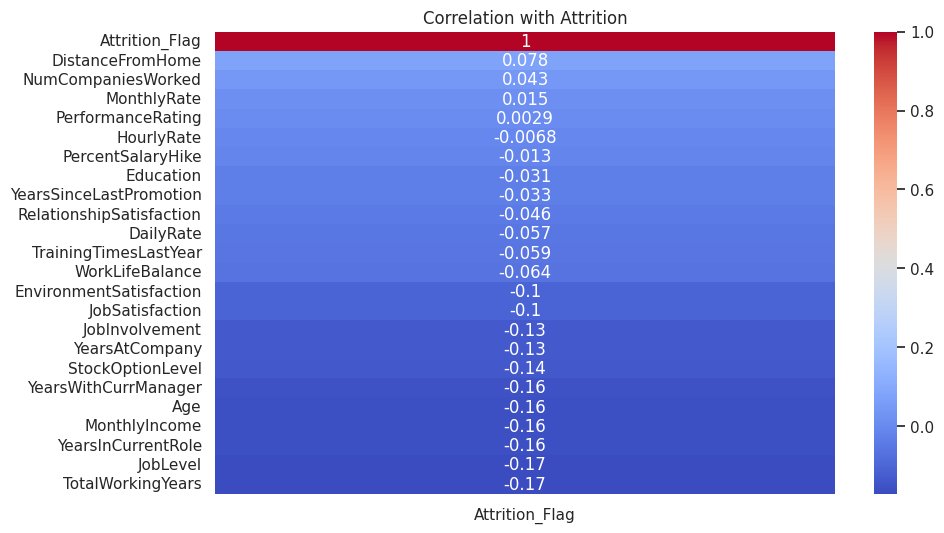

In [14]:
correlation = data_cleaned.corr(numeric_only=True)[["Attrition_Flag"]].sort_values(by="Attrition_Flag", ascending=False)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation with Attrition")

* Key negative correlations:
  *  YearsAtCompany, JobLevel, MonthlyIncome, SatisfactionIndex

* Positive correlation:

  * OverTime and NumCompaniesWorked

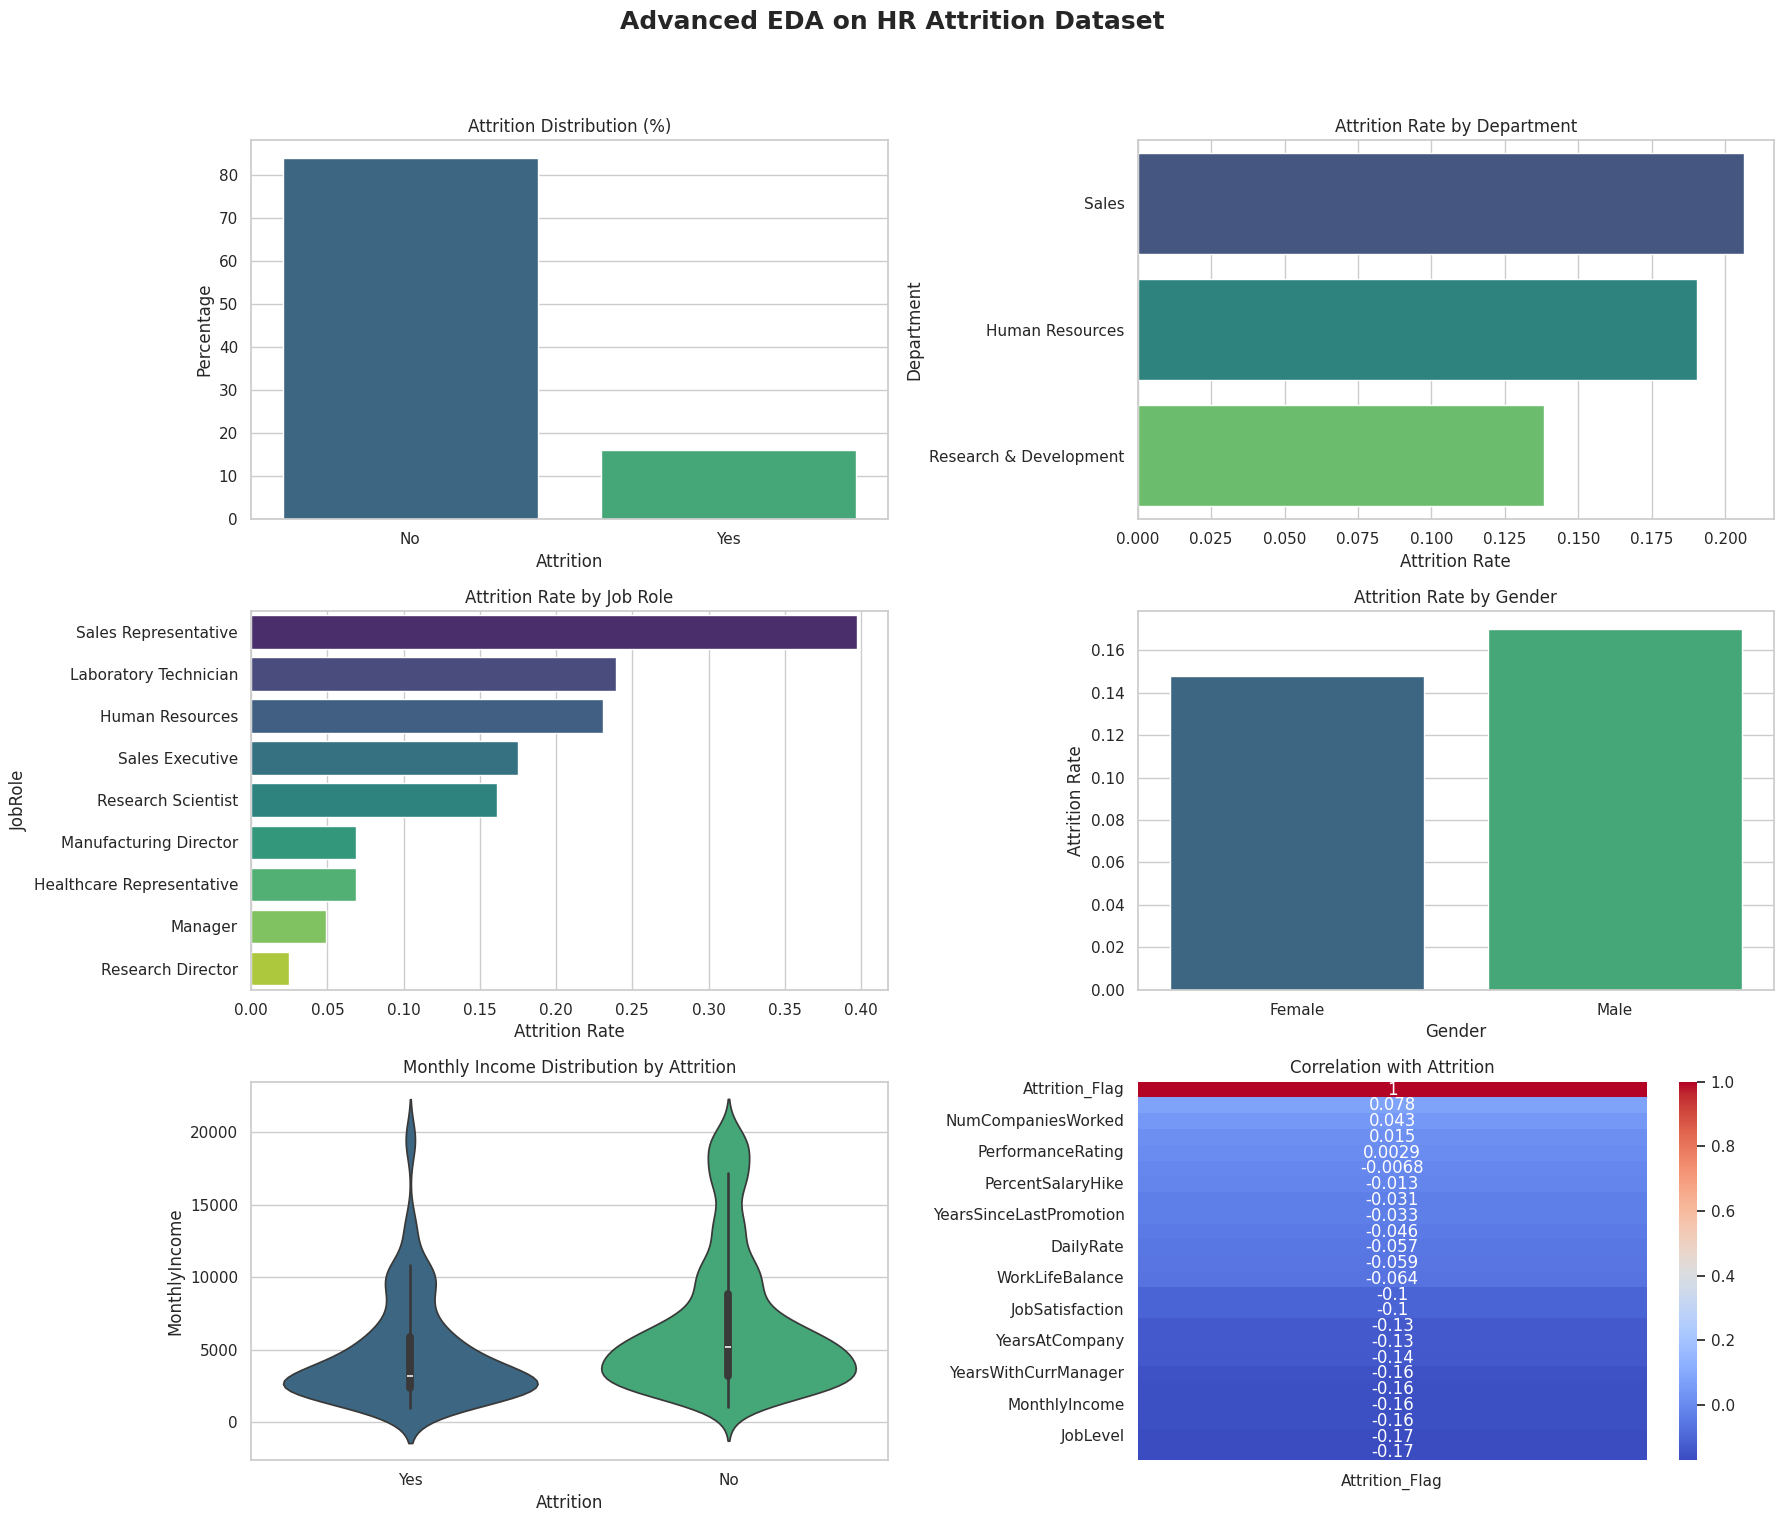

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(18, 16))
fig.suptitle("Advanced EDA on HR Attrition Dataset", fontsize=18, fontweight='bold')


sns.barplot(x=attrition_dist.index, y=attrition_dist.values, ax=axes[0, 0], palette="viridis")
axes[0, 0].set_title("Attrition Distribution (%)")
axes[0, 0].set_ylabel("Percentage")
axes[0, 0].set_xlabel("Attrition")


sns.barplot(x=attrition_by_dept.values, y=attrition_by_dept.index, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title("Attrition Rate by Department")
axes[0, 1].set_xlabel("Attrition Rate")


sns.barplot(x=attrition_by_job.values, y=attrition_by_job.index, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title("Attrition Rate by Job Role")
axes[1, 0].set_xlabel("Attrition Rate")


sns.barplot(x=attrition_by_gender.index, y=attrition_by_gender.values, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("Attrition Rate by Gender")
axes[1, 1].set_ylabel("Attrition Rate")
axes[1, 1].set_xlabel("Gender")


sns.violinplot(x="Attrition", y="MonthlyIncome", data=data_cleaned, ax=axes[2, 0], palette="viridis")
axes[2, 0].set_title("Monthly Income Distribution by Attrition")


correlation = data_cleaned.corr(numeric_only=True)[["Attrition_Flag"]].sort_values(by="Attrition_Flag", ascending=False)
sns.heatmap(correlation, annot=True, cmap="coolwarm", ax=axes[2, 1])
axes[2, 1].set_title("Correlation with Attrition")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 3. Feature Engineering

In [16]:
satisfaction_cols = [
    'EnvironmentSatisfaction',
    'JobSatisfaction',
    'RelationshipSatisfaction',
    'WorkLifeBalance',
    'JobInvolvement'
]

In [17]:
data_cleaned['SatisfactionIndex'] = data_cleaned[satisfaction_cols].mean(axis=1)



In [18]:
data_cleaned['LoyaltyIndex'] = data_cleaned.apply(
    lambda row: row['YearsWithCurrManager'] / row['YearsAtCompany'] if row['YearsAtCompany'] > 0 else 0,
    axis=1
)

In [19]:
data_cleaned['FastPromoted'] = data_cleaned['YearsSinceLastPromotion'].apply(lambda x: 1 if x < 2 else 0)

In [20]:
data_cleaned['IncomeBucket'] = pd.cut(
    data_cleaned['MonthlyIncome'],
    bins=[0, 3000, 6000, 9000, 15000, data_cleaned['MonthlyIncome'].max()],
    labels=['Very Low', 'Low', 'Medium', 'High', 'Very High']
)

In [21]:
data_cleaned['AgeGroup'] = pd.cut(
    data_cleaned['Age'],
    bins=[17, 25, 35, 45, 55, data_cleaned['Age'].max()],
    labels=['<25', '25-35', '35-45', '45-55', '55+']
)

In [22]:
data_cleaned[['SatisfactionIndex', 'LoyaltyIndex', 'FastPromoted', 'IncomeBucket', 'AgeGroup']].head()

,SatisfactionIndex,LoyaltyIndex,FastPromoted,IncomeBucket,AgeGroup
0,2.2,0.833333,1,Low,35-45
1,2.8,0.700000,1,Low,45-55
2,2.8,0.000000,1,Very Low,35-45
3,3.2,0.000000,0,Very Low,25-35
4,2.6,1.000000,0,Low,25-35


## 4. Predictive Modeling

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [24]:
# Encode categorical features including the newly created ones
categorical_cols = data_cleaned.select_dtypes(include=['object','category']).columns.tolist()
categorical_cols.remove('Attrition')  # target column

In [25]:
data_encoded = data_cleaned.copy()

le = LabelEncoder()

for col in categorical_cols:
    data_encoded[col] = le.fit_transform(data_encoded[col])



In [26]:
# Define features and target
x = data_encoded.drop(columns=['Attrition', 'Attrition_Flag'])
y = data_encoded['Attrition_Flag']


In [27]:
# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [28]:
x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled_df, y, test_size=0.3, random_state=42, stratify=y)

In [30]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [31]:
ypred = model.predict(xtest)
yprob = model.predict_proba(xtest)[:, 1]
conf_matrix = confusion_matrix(ytest, ypred)
class_report = classification_report(ytest, ypred, output_dict=True)
roc_auc = roc_auc_score(ytest, yprob)

In [32]:
conf_matrix, class_report, roc_auc

(array([[358,  12],
        [ 61,  10]]),
 {'0': {'precision': 0.8544152744630071,
   'recall': 0.9675675675675676,
   'f1-score': 0.9074778200253485,
   'support': 370.0},
  '1': {'precision': 0.45454545454545453,
   'recall': 0.14084507042253522,
   'f1-score': 0.21505376344086022,
   'support': 71.0},
  'accuracy': 0.8344671201814059,
  'macro avg': {'precision': 0.6544803645042309,
   'recall': 0.5542063189950514,
   'f1-score': 0.5612657917331043,
   'support': 441.0},
  'weighted avg': {'precision': 0.7900371401905667,
   'recall': 0.8344671201814059,
   'f1-score': 0.7959991170378231,
   'support': 441.0}},
 np.float64(0.7463075751808146))

In [33]:
!pip install shap

## 5. Explainable AI (Bonus)

In [36]:
import shap

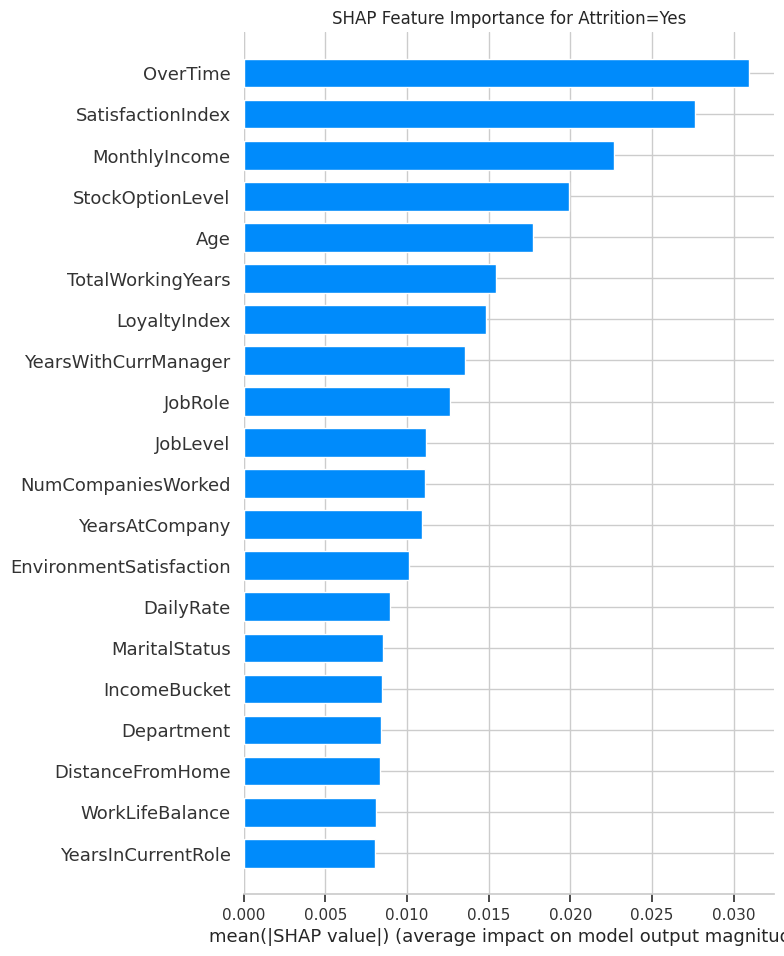

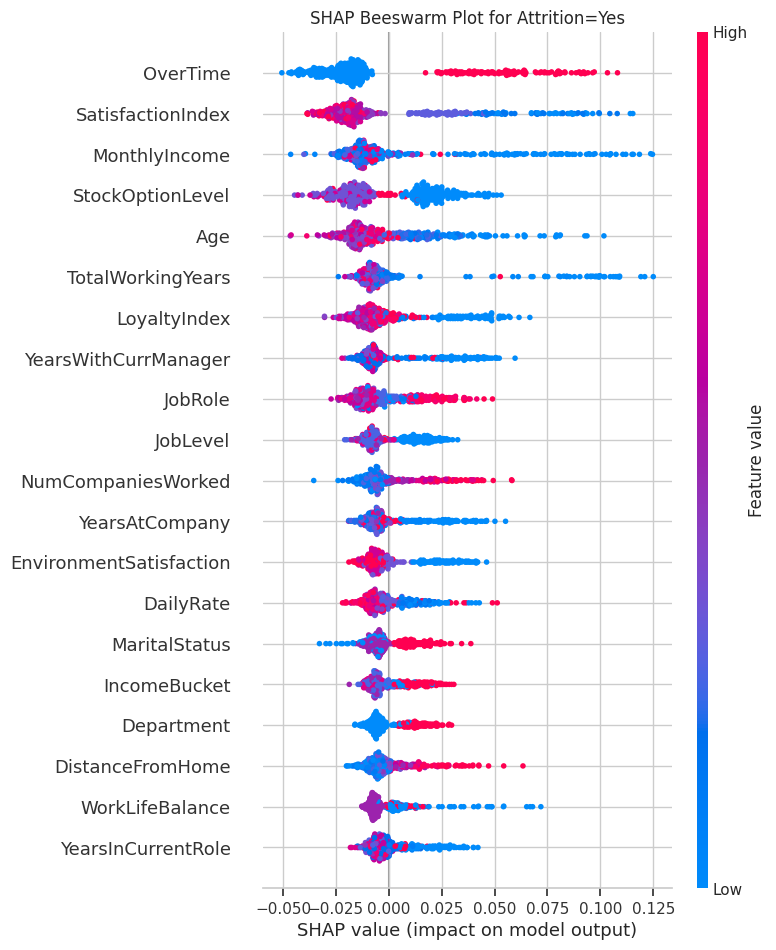

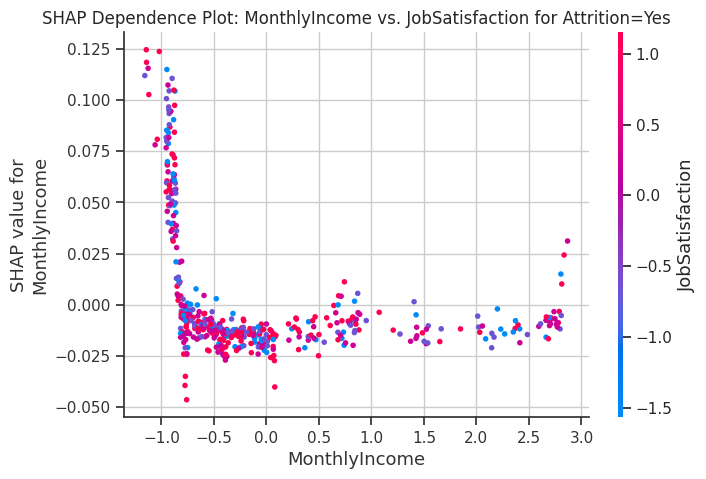

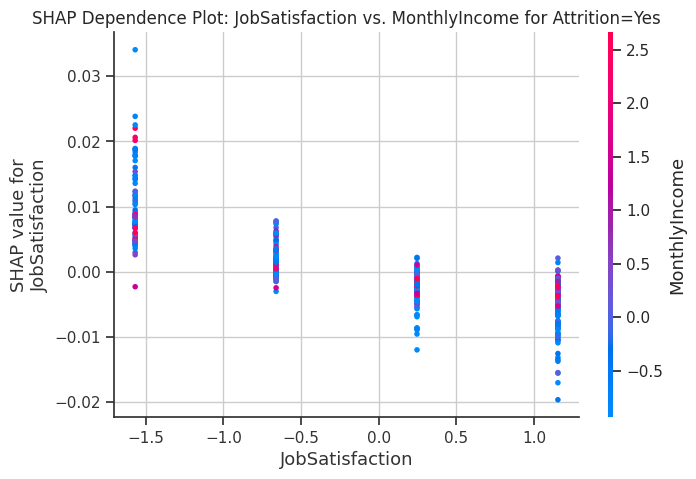

In [39]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(xtest)


shap.summary_plot(shap_values[:, :, 1], xtest, plot_type="bar", show=False)
plt.title("SHAP Feature Importance for Attrition=Yes")
plt.show()


shap.summary_plot(shap_values[:, :, 1], xtest, show=False)
plt.title("SHAP Beeswarm Plot for Attrition=Yes")
plt.show()


instance_index = 0
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[instance_index, :, 1], xtest.iloc[instance_index,:], show=False)
plt.show()


shap.dependence_plot("MonthlyIncome", shap_values[:, :, 1], xtest, interaction_index="JobSatisfaction", show=False)
plt.title("SHAP Dependence Plot: MonthlyIncome vs. JobSatisfaction for Attrition=Yes")
plt.show()

shap.dependence_plot("JobSatisfaction", shap_values[:, :, 1], xtest, interaction_index="MonthlyIncome", show=False)
plt.title("SHAP Dependence Plot: JobSatisfaction vs. MonthlyIncome for Attrition=Yes")
plt.show()

## 6. Insights & Recommendations

# Final Insights & Recommendations

## Insights
### 1. Top Predictors of Attrition
According to SHAP values:

*  OverTime, SatisfactionIndex, MonthlyIncome, and LoyaltyIndex are the most influential features.

* Low SatisfactionIndex (avg. of 5 satisfaction metrics) strongly correlates with attrition.
*  High OverTime pushes attrition risk sharply up — top feature in every model.


* Employees with short tenure or fewer promotions (FastPromoted = 0) are more likely to leave.


### 2. Behavioral & Demographic Patterns
* Younger employees (esp. under 35) show significantly higher attrition.

* Sales Representatives, Lab Technicians, and HR roles face higher churn.

* Employees with low monthly income and no recent promotion are more at risk.

* Frequent business travelers (especially young + traveling) tend to leave more.


### 3. Job Satisfaction Interactions
* SHAP dependence plots reveal that even high-paying roles can't retain employees with low job satisfaction.

* Conversely, lower-paid but satisfied employees tend to stay longer.


## Recommendations
### 1. Targeted Retention Strategy
* Focus efforts on Sales, Lab Techs, and HR roles.

* Provide career growth paths and regular engagement reviews.

### 2. Reduce OverTime
* Identify and reallocate workloads for employees with sustained overtime hours.
* Promote work-life balance — especially in tech and support functions.

### 3. Early Tenure Engagement
* Attrition spikes during the first 2 years — improve onboarding, mentorship, and early recognition programs.

### 4. Performance-Linked Growth
* Attrition is lower among those recently promoted.
* Consider “mini-promotions” or internal mobility every 12–18 months.

### 5. Compensation Review
* Attrition is high in “Very Low” and “Low” Income Buckets.
* Benchmark compensation in critical roles; offer skill-based bonus structure.

### 6. Manager Loyalty Index
* Higher LoyaltyIndex (Years with Manager / Years at Company) = lower attrition.

* Encourage manager continuity and skip-level feedback to improve retention.



